# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [2]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
# dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [3]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)

In [6]:
# import pandas as pd
# pedDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-pedestrians.csv")
# otherDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-others.csv")
# pedDf.head()

In [7]:
from extractors.LocationData import LocationData
scene10 = LocationData.load("../data/location-2", "2022-12-02-fps-5-scene-10.dll")

2022-12-02 08:56:37.053 | INFO     | extractors.LocationData:load:486 - reading from ../data/location-2\2022-12-02-fps-5-scene-10.dll


In [13]:

# scene10.backgroundImagePath = "G:AV datasets/inD-dataset-v1.0/data/18_background.png"

2022-12-02 08:56:42.917 | INFO     | tools.TrajectoryVisualizer:initPlot:34 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


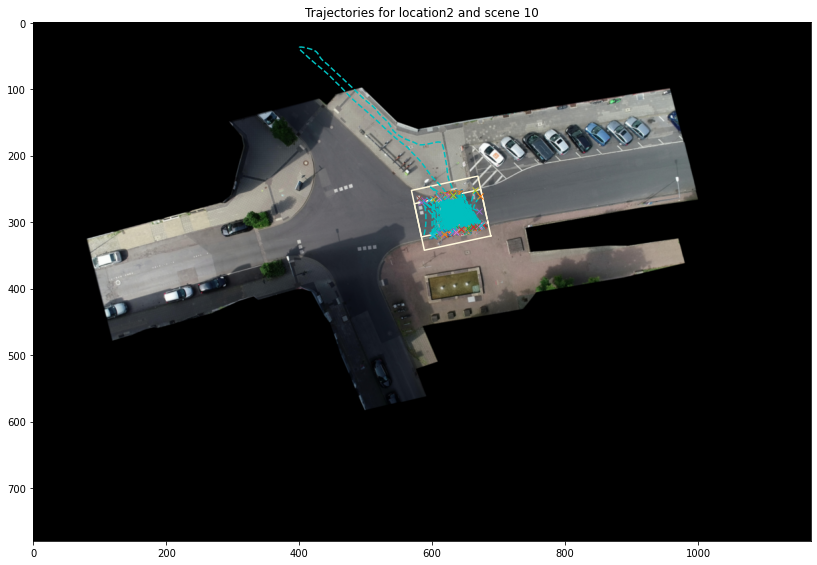

In [8]:
# visualizer.showLocationSceneData(scene10, onlyClipped=True, showOthers=True)
visualizer.showLocationSceneData(scene10, onlyClipped=True)

In [17]:
pedDf = scene10.getPedDataInSceneCoordinates()
otherDf = scene10.getOtherDataInSceneCoordinates()
# sceneMeta = scene10.getMeta()

In [21]:
pedDf.groupby(["uniqueTrackId"]).count()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,sceneId,roadWidth,sceneX,sceneY
uniqueTrackId,,,,,,,,,,,,,,,,,,
21102,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
23118,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
26255,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
26403,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
27147,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
27159,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
27418,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
27424,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
27426,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [19]:
sceneMeta.head()

,uniqueTrackId,initialFrame,finalFrame,numFrames,class,horizontalDirection,verticalDirection
0,18339,22484,22494,15,pedestrian,WEST,SOUTH
1,18365,24194,24204,19,pedestrian,EAST,NORTH
2,19072,4550,4560,23,pedestrian,WEST,SOUTH
3,19094,6016,6026,20,pedestrian,WEST,SOUTH
4,20287,17907,17917,19,pedestrian,EAST,SOUTH


In [23]:
sceneMeta.tail()

,uniqueTrackId,initialFrame,finalFrame,numFrames,class,horizontalDirection,verticalDirection
2310,29537,27915,27925,17,bicycle,EAST,SOUTH
2311,29563,29411,29421,19,bicycle,WEST,NORTH
2312,29565,29357,29367,17,bicycle,EAST,SOUTH
2313,29571,29698,29708,27,bicycle,EAST,NORTH
2314,29583,30869,30879,19,bicycle,EAST,SOUTH


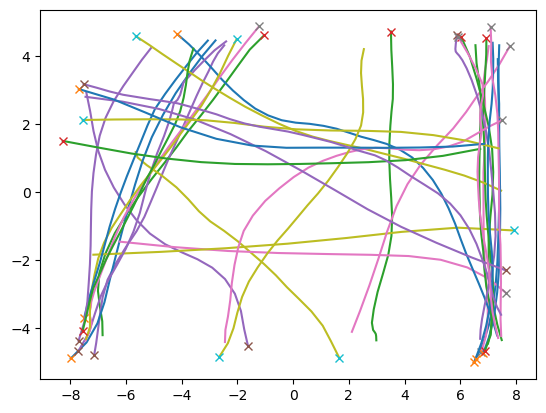

In [30]:
visualizer.showLocalTrajectories(pedDf, "uniqueTrackId", "sceneX", "sceneY") 
# Need cleaning. But, first query this pedestrian ids and check what happened. validate these trajectories velocity to ensure they are indeed pedestrians. 
# If they are we need to create another class - horizontal-pedestrians because they might belong to a scenario.

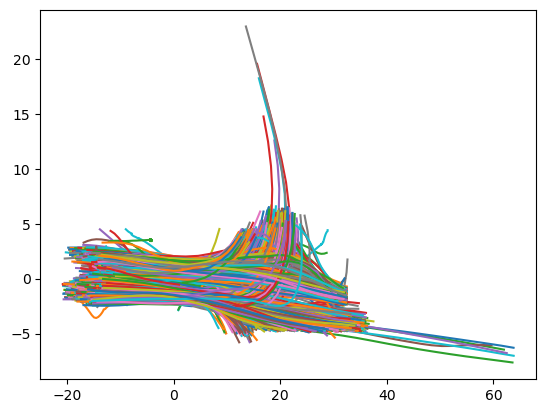

In [27]:
visualizer.showLocalTrajectories(otherDf, "uniqueTrackId", "sceneX", "sceneY")